#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('D:\\Study\\ML-Projects\\Project-2(Laptop_Price_Predictor)\\notebooks\\data\\laptop_price_cleaned.csv')

#### Top 5 Records

In [3]:
df.head()

,Company,TypeName,Ram(GB),Weight(kg),Touchscreen,IPS,PPI,Cpu_Brand,HDD(GB),SSD(GB),Hybrid(GB),Flash_Storage(GB),Gpu_Brand,Os,Price_BDT
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac OS,11.992087
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac OS,11.593113
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux,11.146258
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac OS,12.630811
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac OS,12.289434


In [4]:
df.shape

(1302, 15)

In [5]:
print("Categories in 'Company' variable:     ",end=" " )
print(df['Company'].unique())

print("Categories in 'Type Name' variable:  ",end=" ")
print(df['TypeName'].unique())

print("Categories in'Cpu Brand' variable:",end=" " )
print(df['Cpu_Brand'].unique())

print("Categories in 'Gpu Brand' variable:     ",end=" " )
print(df['Gpu_Brand'].unique())

print("Categories in 'Os' variable:     ",end=" " )
print(df['Os'].unique())

Categories in 'Company' variable:      ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Categories in 'Type Name' variable:   ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Categories in'Cpu Brand' variable: ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel processors']
Categories in 'Gpu Brand' variable:      ['Intel' 'AMD' 'Nvidia']
Categories in 'Os' variable:      ['Mac OS' 'Others/No OS/Linux' 'Windows']


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['Price_BDT'],axis=1)

In [7]:
X.sample(1)

,Company,TypeName,Ram(GB),Weight(kg),Touchscreen,IPS,PPI,Cpu_Brand,HDD(GB),SSD(GB),Hybrid(GB),Flash_Storage(GB),Gpu_Brand,Os
721,HP,2 in 1 Convertible,8,1.58,1,1,117.82653,Intel Core i5,0,256,0,0,Intel,Windows


In [8]:
y = df['Price_BDT']

In [9]:
y

0       11.992087
1       11.593113
2       11.146258
3       12.630811
4       12.289434
          ...    
1297    11.250235
1298    12.104450
1299    10.225607
1300    11.430456
1301    10.702683
Name: Price_BDT, Length: 1302, dtype: float64

#### Creating Column Transformer with 3 types of transformers

In [27]:
X

array([[-0.0758498 , -1.00661333, -0.41462898, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0758498 , -1.05172487, -0.41462898, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0758498 , -0.2697915 , -0.41462898, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.25620561, -0.81112999, -0.41462898, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46930174,  0.22643545, -0.41462898, ...,  0.        ,
         0.        ,  1.        ],
       [-0.86275367,  0.24147263, -0.41462898, ...,  0.        ,
         0.        ,  1.        ]])

In [10]:
numeric_features = X.select_dtypes(exclude='object').columns
numeric_features

Index(['Ram(GB)', 'Weight(kg)', 'Touchscreen', 'IPS', 'PPI', 'HDD(GB)',
       'SSD(GB)', 'Hybrid(GB)', 'Flash_Storage(GB)'],
      dtype='object')

In [11]:
cat_features = X.select_dtypes(include='object').columns
cat_features

Index(['Company', 'TypeName', 'Cpu_Brand', 'Gpu_Brand', 'Os'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('StandardScaler',numeric_transformer,numeric_features),
        ('OneHotEncoder',ohe_transformer,cat_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1302, 45)

In [15]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.075850,-1.006613,-0.414629,1.605280,1.867826,-0.802994,-0.298454,-0.095452,-0.149831,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.075850,-1.051725,-0.414629,-0.622944,-0.438780,-0.802994,-0.978584,-0.095452,4.079543,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.075850,-0.269791,-0.414629,-0.622944,-0.124418,-0.802994,0.381675,-0.095452,-0.149831,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.497958,-0.314903,-0.414629,1.605280,1.718046,-0.802994,1.741933,-0.095452,-0.149831,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.075850,-1.006613,-0.414629,1.605280,1.867826,-0.802994,0.381675,-0.095452,-0.149831,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### separating dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1041, 45), (261, 45))

#### Creating an Evaluating Function to give all metrics after model Training

In [17]:
def evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mse)
    r_square = r2_score(actual,predicted)
    
    return mae,mse,rmse,r_square

In [18]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_test_list =[]

In [19]:
for i in range(len(models.keys())):
    print(list(models.keys())[i])

Linear Regression
Lasso
Ridge
K-Neighbors Regressor
Decision Tree Regressor
Random Forest Regressor
XGBRegressor
CatBoosting Regressor
AdaBoost Regressor


In [20]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # model prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluating training and test dataset
    train_mae,train_mse,train_rmse,train_r2_score = evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2_score = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_mse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_score))
    r2_test_list.append(test_r2_score)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2523
- Mean Absolute Error: 0.1955
- R2 Score: 0.8367
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0741
- Mean Absolute Error: 0.2144
- R2 Score: 0.8076


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.6244
- Mean Absolute Error: 0.5119
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3861
- Mean Absolute Error: 0.5011
- R2 Score: -0.0022


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2528
- Mean Absolute Error: 0.1963
- R2 Score: 0.8361
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0737
- Mean Absolute Error: 0.2141
- R2 Score: 0.8086


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2018
- Mean Absolute Error: 0.1525
- R2 Score: 0.8955
----------------------

In [21]:
pd.DataFrame(list(zip(model_list, r2_test_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.894171
6,XGBRegressor,0.882165
5,Random Forest Regressor,0.879152
4,Decision Tree Regressor,0.855169
3,K-Neighbors Regressor,0.831171
2,Ridge,0.808632
0,Linear Regression,0.807647
8,AdaBoost Regressor,0.776399
1,Lasso,-0.002202


## CatBoost Regressor

In [22]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.041204
0:	learn: 0.6077466	total: 1.23ms	remaining: 1.23s
1:	learn: 0.5931722	total: 2.29ms	remaining: 1.14s
2:	learn: 0.5774101	total: 3.29ms	remaining: 1.09s
3:	learn: 0.5623318	total: 4.24ms	remaining: 1.05s
4:	learn: 0.5475420	total: 5.24ms	remaining: 1.04s
5:	learn: 0.5339812	total: 6.27ms	remaining: 1.04s
6:	learn: 0.5207642	total: 7.25ms	remaining: 1.03s
7:	learn: 0.5076067	total: 8.28ms	remaining: 1.03s
8:	learn: 0.4953832	total: 9.24ms	remaining: 1.02s
9:	learn: 0.4836635	total: 10.2ms	remaining: 1.01s
10:	learn: 0.4718857	total: 11.2ms	remaining: 1.01s
11:	learn: 0.4607163	total: 12.2ms	remaining: 1.01s
12:	learn: 0.4492858	total: 13.2ms	remaining: 1s
13:	learn: 0.4394819	total: 14.1ms	remaining: 996ms
14:	learn: 0.4301460	total: 15.1ms	remaining: 993ms
15:	learn: 0.4212107	total: 16.3ms	remaining: 1s
16:	learn: 0.4127087	total: 17.3ms	remaining: 1000ms
17:	learn: 0.4046780	total: 18.4ms	remaining: 1s
18:	learn: 0.3965558	total: 19.4ms	remaining: 1s
19:

174:	learn: 0.1934976	total: 179ms	remaining: 845ms
175:	learn: 0.1932658	total: 180ms	remaining: 845ms
176:	learn: 0.1929289	total: 181ms	remaining: 844ms
177:	learn: 0.1925114	total: 182ms	remaining: 843ms
178:	learn: 0.1922549	total: 184ms	remaining: 842ms
179:	learn: 0.1919502	total: 185ms	remaining: 841ms
180:	learn: 0.1916498	total: 186ms	remaining: 840ms
181:	learn: 0.1912915	total: 187ms	remaining: 839ms
182:	learn: 0.1910116	total: 188ms	remaining: 838ms
183:	learn: 0.1909056	total: 189ms	remaining: 837ms
184:	learn: 0.1906271	total: 190ms	remaining: 836ms
185:	learn: 0.1903663	total: 191ms	remaining: 836ms
186:	learn: 0.1901111	total: 192ms	remaining: 835ms
187:	learn: 0.1898570	total: 193ms	remaining: 835ms
188:	learn: 0.1894472	total: 194ms	remaining: 834ms
189:	learn: 0.1893315	total: 196ms	remaining: 834ms
190:	learn: 0.1891046	total: 197ms	remaining: 833ms
191:	learn: 0.1888358	total: 198ms	remaining: 832ms
192:	learn: 0.1886141	total: 199ms	remaining: 831ms
193:	learn: 

353:	learn: 0.1618524	total: 364ms	remaining: 665ms
354:	learn: 0.1618391	total: 365ms	remaining: 664ms
355:	learn: 0.1618294	total: 366ms	remaining: 663ms
356:	learn: 0.1616305	total: 367ms	remaining: 662ms
357:	learn: 0.1613958	total: 368ms	remaining: 661ms
358:	learn: 0.1613875	total: 369ms	remaining: 660ms
359:	learn: 0.1613011	total: 370ms	remaining: 659ms
360:	learn: 0.1612931	total: 371ms	remaining: 657ms
361:	learn: 0.1610200	total: 372ms	remaining: 656ms
362:	learn: 0.1608290	total: 373ms	remaining: 655ms
363:	learn: 0.1606429	total: 375ms	remaining: 654ms
364:	learn: 0.1605610	total: 376ms	remaining: 654ms
365:	learn: 0.1605458	total: 377ms	remaining: 652ms
366:	learn: 0.1603722	total: 378ms	remaining: 651ms
367:	learn: 0.1602420	total: 379ms	remaining: 651ms
368:	learn: 0.1600600	total: 380ms	remaining: 650ms
369:	learn: 0.1599441	total: 381ms	remaining: 649ms
370:	learn: 0.1598308	total: 382ms	remaining: 648ms
371:	learn: 0.1597069	total: 383ms	remaining: 647ms
372:	learn: 

539:	learn: 0.1424440	total: 552ms	remaining: 470ms
540:	learn: 0.1423482	total: 553ms	remaining: 469ms
541:	learn: 0.1421876	total: 554ms	remaining: 468ms
542:	learn: 0.1420715	total: 555ms	remaining: 467ms
543:	learn: 0.1419191	total: 556ms	remaining: 466ms
544:	learn: 0.1418579	total: 557ms	remaining: 465ms
545:	learn: 0.1418524	total: 558ms	remaining: 464ms
546:	learn: 0.1417483	total: 559ms	remaining: 463ms
547:	learn: 0.1416763	total: 560ms	remaining: 462ms
548:	learn: 0.1416087	total: 561ms	remaining: 461ms
549:	learn: 0.1415107	total: 562ms	remaining: 460ms
550:	learn: 0.1414757	total: 563ms	remaining: 459ms
551:	learn: 0.1413717	total: 564ms	remaining: 458ms
552:	learn: 0.1413013	total: 565ms	remaining: 457ms
553:	learn: 0.1412687	total: 567ms	remaining: 456ms
554:	learn: 0.1411280	total: 568ms	remaining: 455ms
555:	learn: 0.1411240	total: 568ms	remaining: 454ms
556:	learn: 0.1410930	total: 569ms	remaining: 453ms
557:	learn: 0.1410594	total: 570ms	remaining: 452ms
558:	learn: 

726:	learn: 0.1297289	total: 741ms	remaining: 278ms
727:	learn: 0.1296282	total: 742ms	remaining: 277ms
728:	learn: 0.1295342	total: 743ms	remaining: 276ms
729:	learn: 0.1295310	total: 744ms	remaining: 275ms
730:	learn: 0.1294746	total: 745ms	remaining: 274ms
731:	learn: 0.1294079	total: 746ms	remaining: 273ms
732:	learn: 0.1293424	total: 747ms	remaining: 272ms
733:	learn: 0.1292599	total: 749ms	remaining: 271ms
734:	learn: 0.1292547	total: 750ms	remaining: 270ms
735:	learn: 0.1291828	total: 751ms	remaining: 269ms
736:	learn: 0.1291621	total: 752ms	remaining: 268ms
737:	learn: 0.1291108	total: 753ms	remaining: 267ms
738:	learn: 0.1290278	total: 754ms	remaining: 266ms
739:	learn: 0.1290245	total: 755ms	remaining: 265ms
740:	learn: 0.1290226	total: 756ms	remaining: 264ms
741:	learn: 0.1289605	total: 757ms	remaining: 263ms
742:	learn: 0.1288833	total: 758ms	remaining: 262ms
743:	learn: 0.1288792	total: 759ms	remaining: 261ms
744:	learn: 0.1288338	total: 760ms	remaining: 260ms
745:	learn: 

920:	learn: 0.1196611	total: 930ms	remaining: 79.8ms
921:	learn: 0.1195803	total: 931ms	remaining: 78.8ms
922:	learn: 0.1194747	total: 932ms	remaining: 77.8ms
923:	learn: 0.1194042	total: 933ms	remaining: 76.8ms
924:	learn: 0.1193898	total: 934ms	remaining: 75.8ms
925:	learn: 0.1193812	total: 935ms	remaining: 74.8ms
926:	learn: 0.1193264	total: 937ms	remaining: 73.8ms
927:	learn: 0.1192122	total: 938ms	remaining: 72.8ms
928:	learn: 0.1191425	total: 939ms	remaining: 71.8ms
929:	learn: 0.1190952	total: 940ms	remaining: 70.7ms
930:	learn: 0.1190751	total: 941ms	remaining: 69.7ms
931:	learn: 0.1190637	total: 942ms	remaining: 68.7ms
932:	learn: 0.1189941	total: 943ms	remaining: 67.7ms
933:	learn: 0.1188904	total: 944ms	remaining: 66.7ms
934:	learn: 0.1187854	total: 945ms	remaining: 65.7ms
935:	learn: 0.1186817	total: 946ms	remaining: 64.7ms
936:	learn: 0.1186390	total: 947ms	remaining: 63.7ms
937:	learn: 0.1185492	total: 948ms	remaining: 62.7ms
938:	learn: 0.1185004	total: 949ms	remaining: 

## Plot y_pred and y_test

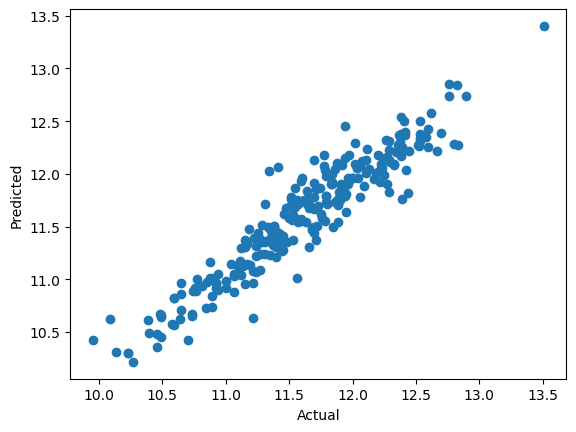

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

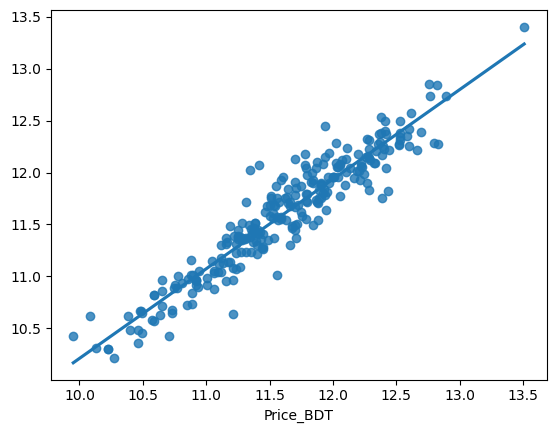

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None);

#### Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
478,11.306602,11.356932,-0.050330
724,11.998630,11.957100,0.041530
312,12.441113,12.214349,0.226764
851,12.340979,12.210100,0.130879
1275,10.920944,10.963367,-0.042423
...,...,...,...
199,11.743664,11.870237,-0.126573
296,11.678423,11.486098,0.192325
286,11.792230,11.976190,-0.183960
997,10.732061,10.648090,0.083972
